#Programming Lab 1
Daniel Diamont
UT EID: dd28977

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

##Q1)

In [28]:
# Create two normal distributions
n1 = np.random.normal(loc = -10, scale = 5, size = 1000)
n2 = np.random.normal(loc = 10, scale = 5, size = 1000)


###a)

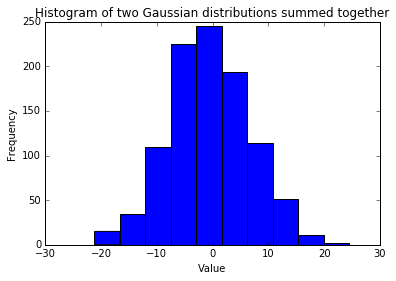

estimated mean of the new distribution is: -0.5227385897197017
estimated variance of the new distribution is: 51.13410146768491


In [29]:
# take the sum of 2 gaussians by adding two sets of 1000 points, point by point
n_sum = n1 + n2

# plot in a histogram
plt.hist(n_sum)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of two Gaussian distributions summed together")
plt.show()

#estimate mean and variance of sum
mean = np.mean(n_sum, dtype=np.float64)
print("estimated mean of the new distribution is: " + str(mean))
var = np.var(n_sum, dtype=np.float64)
print("estimated variance of the new distribution is: " + str(var))

##Q2)

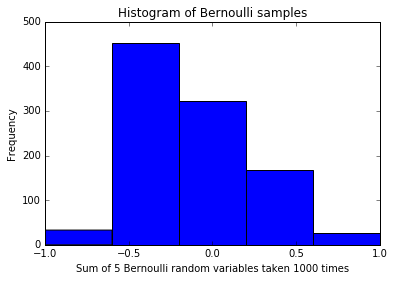

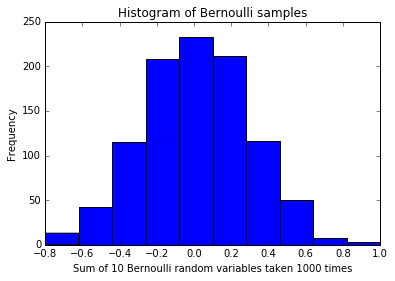

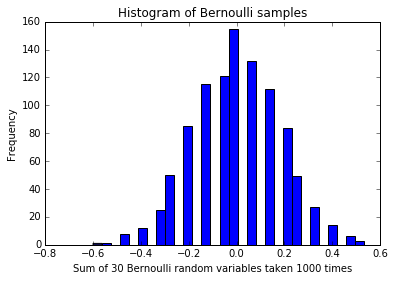

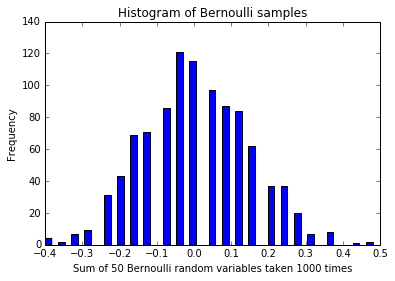

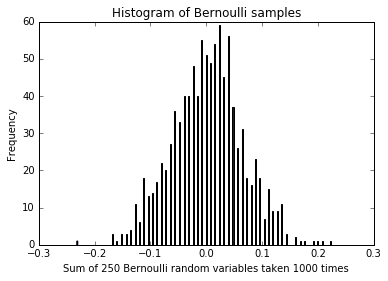

In [5]:
# define Xi random variable (iid Bernoulli ({-1,1})
def sample_Xi(n):
    sum = np.zeros(n)
    
    for i in range(n):
        sample = np.random.uniform()
        if(sample >= 0.5):
            sum[i] = 1
        else:
            sum[i] = -1
    
    return np.sum(sum)/n
    
def plot_hist(n, draws=1000):
    Zn = np.zeros(draws)
    
    for i in range(draws):
        Zn[i] = sample_Xi(n)
        
    plt.hist(Zn, bins=n)
    plt.title("Histogram of Bernoulli samples")
    plt.xlabel("Sum of " + str(n) + " Bernoulli random variables taken " + str(draws) + " times")
    plt.ylabel("Frequency")
    plt.show()
    
    
plot_hist(5)
plot_hist(10)
plot_hist(30)
plot_hist(50)
plot_hist(250)


##Q3)

In [6]:
# generate 25,000 samples from a gaussian distribution with mean 0 and std dev 5
norm_dist = np.random.normal(loc = 0, scale = 5, size = 25000)

# calculate estimated mean
mean_est = np.sum(norm_dist)/(norm_dist.size)
print("Estimated mean of distribution is: " + str(mean_est))

#calculate variance E[(X - E[X])^2]
x_minus_mean_sq = (norm_dist - mean_est)*(norm_dist - mean_est)
var_est = np.sum(x_minus_mean_sq)/(x_minus_mean_sq.size)

#calculate standard deviation as sqrt(variance)
std_dev = np.sqrt(var_est)

print("Estimated std dev of distribution is: " + str(std_dev))

Estimated mean of distribution is: -0.011535187621614918
Estimated std dev of distribution is: 5.012009095509666


##Q4)

In [34]:
#mean matrix
u = [-5,5]
#covariance matrix
covar = [[20, 0.8],[0.8,30]]

# generate 10,000 samples of 2D data from Gaussian distribution
d1,d2 = np.random.multivariate_normal(u, covar, 10000).T

#estimate the mean of the distribution
u1 = np.sum(d1)/d1.size
u2 = np.sum(d2)/d2.size
u_est = u1 + u2

#estimate the covariance matrix for the data
t1 = (d1-u1)*(d1-u1)
var1 = np.sum(t1)/t1.size #variance of distribution 1
t2 = (d2-u2)*(d2-u2)
var2 = np.sum(t2)/t2.size #variance of distribution 2

t_co = (d1-u1)*(d2-u2)
covar = np.sum(t_co)/t_co.size #covariance of distribution 1 and 2

cov = [] # covariance matrix
cov.append([var1,covar])
cov.append([covar,var2])

print("Estimated mean of the distribution: " + str(u_est))
print("Covariance matrix of the distribution: ")

df = pd.DataFrame(cov)
df.rename(index={0:'d1',1:'d2'}, inplace=True)
df.rename(columns={0:'d1',1:'d2'}, inplace=True)
display(df)


Estimated mean of the distribution: -0.04328205441751809
Covariance matrix of the distribution: 


,d1,d2
d1,20.243823,0.354612
d2,0.354612,30.877669


##Q5)

Feature Exploration

In [44]:
#load PatientData
data = pd.read_csv("PatientData.csv",header=None,na_values='?')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


###a) How many patients and how many features?

In [45]:
data.shape

(452, 280)

We can see that there are 451 rows and 280 columns referring to 451 patients with 280 features per patient

###b) What is the meaning of the first four features?

Exploring column 0

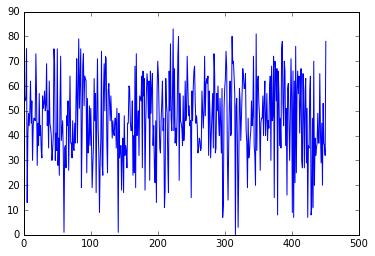

In [46]:
plt.plot(data[0])

(array([ 1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.,  2.,  0.,  0.,
         3.,  1.,  2.,  1.,  0.,  2.,  1.,  3.,  3.,  4.,  0.,  3.,  2.,
         2.,  0.,  3.,  0.,  4.,  3.,  7.,  3.,  3.,  0.,  7.,  6.,  7.,
         7.,  9.,  0., 13., 14., 14.,  5.,  8.,  0., 12.,  6.,  8.,  7.,
         0., 13., 13., 15., 14., 11.,  0.,  8., 12.,  7.,  6., 10.,  0.,
         9.,  6.,  9., 12., 11.,  0.,  9.,  4.,  5., 10.,  8.,  0., 11.,
         6.,  8.,  6.,  4.,  0.,  4.,  5.,  4.,  7.,  4.,  0.,  2.,  6.,
         1.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  1.]),
 array([ 0.  ,  0.83,  1.66,  2.49,  3.32,  4.15,  4.98,  5.81,  6.64,
         7.47,  8.3 ,  9.13,  9.96, 10.79, 11.62, 12.45, 13.28, 14.11,
        14.94, 15.77, 16.6 , 17.43, 18.26, 19.09, 19.92, 20.75, 21.58,
        22.41, 23.24, 24.07, 24.9 , 25.73, 26.56, 27.39, 28.22, 29.05,
        29.88, 30.71, 31.54, 32.37, 33.2 , 34.03, 34.86, 35.69, 36.52,
        37.35, 38.18, 39.01, 39.84, 40.67, 41.5 , 42.33, 43.16, 43.99,
        

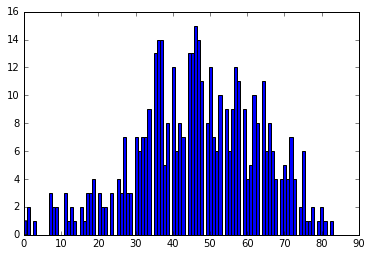

In [183]:
plt.hist(data[0], bins=100)

In [49]:
mean_col_0 = np.mean(data[0])
std_dev_col_0 = np.std(data[0])
print("Mean of column 0 is: " + str(mean_col_0))
print("Standard Deviation of column 0 is: " + str(std_dev_col_0))

Mean of column 0 is: 46.4712389380531
Standard Deviation of column 0 is: 16.448405933617636


I suspect that this is patient age given that the mean is about 46.5 years of age. I suspect that the population of the U.S. has a mean within one standard deviation of this distribution. Additional notes supporting this assertian are that there are no outliers and no negative numbers.

Let's check US census data to see if this makes sense.

Link to dataset from US census: https://www.census.gov/data/tables/2017/demo/popest/nation-detail.html#par_textimage_98372960

This dataset contains the age of people in the U.S. during the 2010 Census.

In [187]:
us_census_data = pd.read_csv("nc-est2017-agesex-res.csv",header=None,na_values='?')
us_census_data.head

<bound method DataFrame.head of       0    1              2                  3                4   \
0    SEX  AGE  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010   
1      0    0        3944153            3944160          3951454   
2      0    1        3978070            3978090          3957695   
3      0    2        4096929            4096939          4090616   
4      0    3        4119040            4119051          4111682   
5      0    4        4063170            4063186          4077326   
6      0    5        4056858            4056872          4064480   
7      0    6        4066381            4066412          4072889   
8      0    7        4030579            4030594          4042967   
9      0    8        4046486            4046497          4025495   
10     0    9        4148353            4148369          4125317   
11     0   10        4172541            4172559          4186959   
12     0   11        4114415            4114443          4115452   
13     0   12   

In [263]:
# plot number of people vs. age for last full census done in 2010
us_census_data_short = us_census_data[2].iloc[1:101] #make no distinction among sex
us_census_data_short = us_census_data_short.astype('int64')
us_census_data_short.head()

1    3944153
2    3978070
3    4096929
4    4119040
5    4063170
Name: 2, dtype: int64

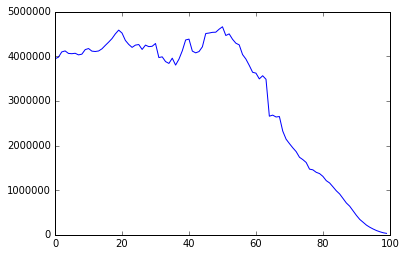

In [264]:
# plot # of people at each age

age = np.arange(100)
plt.plot(age,us_census_data_short)

In [265]:
# calculate mean age
total_pop = us_census_data[2][102]
total_pop
sum = np.zeros(100)
var = np.zeros(100)

short_np = us_census_data_short.values
short_np = short_np/float(total_pop) # turn frequency into probability masses

# short_np[5]
# us_census_data_short[5]*age[5]
for i in range(100):
    sum[i] = (short_np[i]*i)
    
mean_age = np.sum(sum)

print("Mean age of population in US during 2010 census: " + str(mean_age))

Mean age of population in US during 2010 census: 37.29410567546405


Because the mean of the US population is within the mean + standard deviation of feature 0, a good guess for feature 0 is patient age.

Now, to explore feature one